In [1]:
import pandas as pd
"""Used for data manipulation and analysis (e.g., reading CSV files, working with DataFrames)"""
import numpy as np           
"""Used for numerical operations, arrays, and mathematical functions"""
import seaborn as sns         
"""Used for data visualization (especially statistical plots like heatmaps, histograms, etc.)"""
import matplotlib.pyplot as plt  
"""Used for creating plots and graphs (line plots, bar charts, scatter plots, etc.)"""
from sklearn.model_selection import train_test_split  
"""Used to split dataset into training and testing sets"""
from sklearn.svm import SVC  
"""Support Vector Classification model from scikit-learn"""
from sklearn.metrics import accuracy_score  
"""Used to evaluate classification model accuracy"""
import pickle                 
"""Used for saving (serializing) and loading (deserializing) Python objects (e.g., ML models)"""



'Used for saving (serializing) and loading (deserializing) Python objects (e.g., ML models)'

## Data Collection


In [2]:
class DataCollector:
    def __init__(self, source_path):
        self.source_path = "laptops.csv"
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.source_path)
        print(f"Data loaded successfully from {self.source_path}")
        return self.data

    def get_data_summary(self):
        if self.data is None:
            print("Data not loaded yet. Please run load_data() first.")
            return
        print("Data Info:")
        print(self.data.info())
        print("\nFirst 5 rows:")
        print(self.data.head())
        
collector = DataCollector('laptops.csv')
data = collector.load_data()
collector.get_data_summary()


Data loaded successfully from laptops.csv
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        199 non-null    object 
 1   Status        199 non-null    object 
 2   Brand         199 non-null    object 
 3   Model         199 non-null    object 
 4   CPU           199 non-null    object 
 5   RAM           199 non-null    int64  
 6   Storage       199 non-null    int64  
 7   Storage type  197 non-null    object 
 8   GPU           66 non-null     object 
 9   Screen        199 non-null    float64
 10  Touch         199 non-null    object 
 11  Final Price   199 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 18.8+ KB
None

First 5 rows:
                                              Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go St

## Data Understanding

In [3]:
class DataUnderstanding:
    def __init__(self, data):
        """Initialize with a pandas DataFrame"""
        self.data = data

    def overview(self):
        """ Display basic info and stats about the dataset"""
        print("Shape of the data:", self.data.shape)
        print("\nData types:\n", self.data.dtypes)
        print("\nMissing values:\n", self.data.isnull().sum())
        print("\nStatistical summary:\n", self.data.describe(include='all'))

    def unique_values(self, column):
        """Print unique values in a column"""
        unique_vals = self.data[column].unique()
        print(f"Unique values in '{column}':\n{unique_vals}")
        
understanding = DataUnderstanding(data)
understanding.overview()
understanding.unique_values('Final Price')


Shape of the data: (199, 12)

Data types:
 Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

Missing values:
 Laptop            0
Status            0
Brand             0
Model             0
CPU               0
RAM               0
Storage           0
Storage type      2
GPU             133
Screen            0
Touch             0
Final Price       0
dtype: int64

Statistical summary:
                                                    Laptop Status   Brand  \
count                                                 199    199     199   
unique                                                199      2      12   
top     ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New  Lenovo   
freq                                                    1

## DATA Preprocessing

In [4]:
class DataPreprocessing:
    def __init__(self, data):
        """ Initialize with a pandas DataFrame"""
        self.data = data

    def drop_columns(self, columns):
        """Drop specified columns from the dataset"""
        self.data = self.data.drop(columns=columns)

    def fill_missing_with_mean(self, columns):
        """Fill missing values in specified columns with mean"""
        for col in columns:
            mean_val = self.data[col].mean()
            self.data[col] = self.data[col].fillna(mean_val)

    def fill_missing_with_mode(self, columns):
        """Fill missing values in specified columns with mode"""
        for col in columns:
            mode_val = self.data[col].mode()[0]
            self.data[col] = self.data[col].fillna(mode_val)

    def encode_categorical(self, columns):
        """ Convert categorical columns to dummy/one-hot encoding"""
        self.data = pd.get_dummies(self.data, columns=columns)

    def normalize_columns(self, columns):
        """Normalize specified numeric columns (Min-Max scaling)"""
        for col in columns:
            min_val = self.data[col].min()
            max_val = self.data[col].max()
            self.data[col] = (self.data[col] - min_val) / (max_val - min_val)

preprocessor = DataPreprocessing(data)

"""Drop irrelevant or too specific columns"""
preprocessor.drop_columns(['Laptop', 'Model'])

""" Fill missing numeric values"""
preprocessor.fill_missing_with_mean(['Final Price', 'RAM'])

""" Fill missing categorical values"""
preprocessor.fill_missing_with_mode(['Touch', 'Storage type'])

""" Encode categorical features"""
preprocessor.encode_categorical(['Brand', 'CPU', 'GPU', 'Storage type', 'Touch', 'Status'])

"""Normalize numeric columns"""
preprocessor.normalize_columns(['RAM', 'Storage', 'Final Price'])

"""Final clean data"""
processed_data = preprocessor.data
print(processed_data.head())





        RAM  Storage  Screen  Final Price  Brand_Acer  Brand_Alurin  \
0  0.142857    0.512    15.6     0.251553       False         False   
1  0.142857    0.256    15.6     0.019602       False          True   
2  0.142857    0.256    15.6     0.179680       False         False   
3  0.428571    1.000    15.6     0.313624       False         False   
4  0.428571    0.512    15.6     0.140481       False         False   

   Brand_Apple  Brand_Asus  Brand_Dell  Brand_Gigabyte  ...  GPU_RTX 4050  \
0        False        True       False           False  ...         False   
1        False       False       False           False  ...         False   
2        False        True       False           False  ...         False   
3        False       False       False           False  ...         False   
4        False       False       False           False  ...         False   

   GPU_RTX 4060  GPU_RTX 4070  GPU_RTX 4080  Storage type_SSD  \
0         False         False         False  

## univariate analysis

count     199.000000
mean      964.197136
std       534.753079
min       239.000000
25%       589.000000
50%       809.010000
75%      1149.000000
max      3299.990000
Name: Final Price, dtype: float64


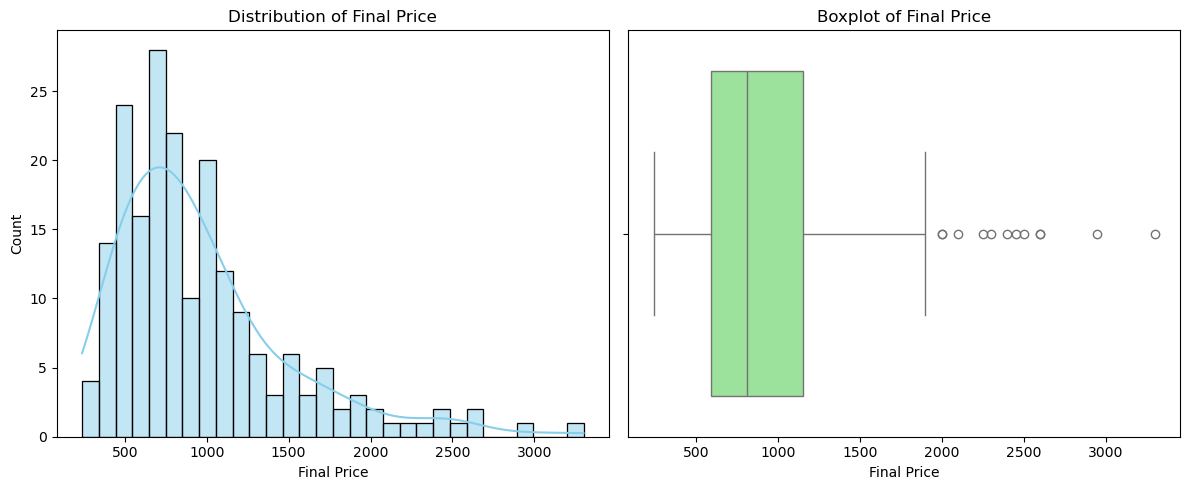

count        199
unique        12
top       Lenovo
freq          54
Name: Brand, dtype: object


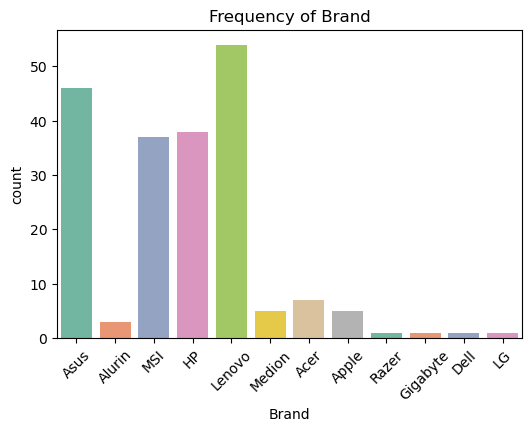

In [5]:
class UnivariateAnalysis:
    def __init__(self, data):
        """Initialize with a pandas DataFrame"""
        self.data = data

    def describe_column(self, column):
        """Print basic statistics of a column"""
        print(self.data[column].describe())

    def plot_numeric(self, column, bins=30, hist_color='skyblue', box_color='lightgreen',
                 fig_width=12, fig_height=5, subplot_row1=1, subplot_col1=2, index1=1,
                 subplot_row2=1, subplot_col2=2, index2=2):
        plt.figure(figsize=(fig_width, fig_height))

        plt.subplot(subplot_row1, subplot_col1, index1)
        sns.histplot(self.data[column], kde=True, bins=bins, color=hist_color)
        plt.title(f'Distribution of {column}')

        plt.subplot(subplot_row2, subplot_col2, index2)
        sns.boxplot(x=self.data[column], color=box_color)
        plt.title(f'Boxplot of {column}')

        plt.tight_layout()
        plt.show()

        
    def plot_categorical(self, column, hue=None, palette='Set2', legend=False, width=6, height=4, rotation=45):
        plt.figure(figsize=(width, height))
        sns.countplot(data=self.data, x=column, hue= column, palette=palette, legend=legend)
        plt.title(f'Frequency of {column}')
        plt.xticks(rotation=rotation)
        plt.show()


        
uni = UnivariateAnalysis(data)

"""For numeric column"""
uni.describe_column('Final Price')
uni.plot_numeric('Final Price')

"""For categorical column"""
uni.describe_column('Brand')
uni.plot_categorical('Brand')



## bivariate analysis

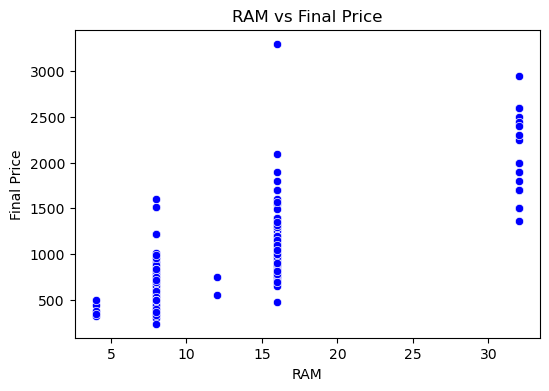

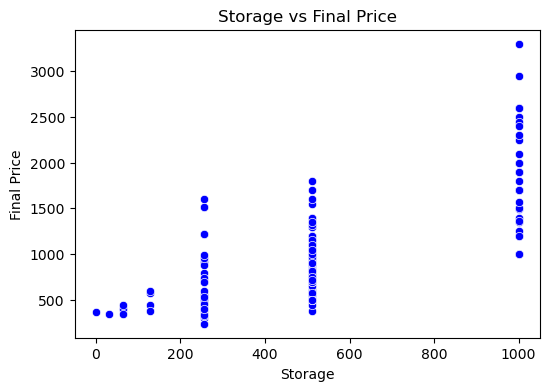

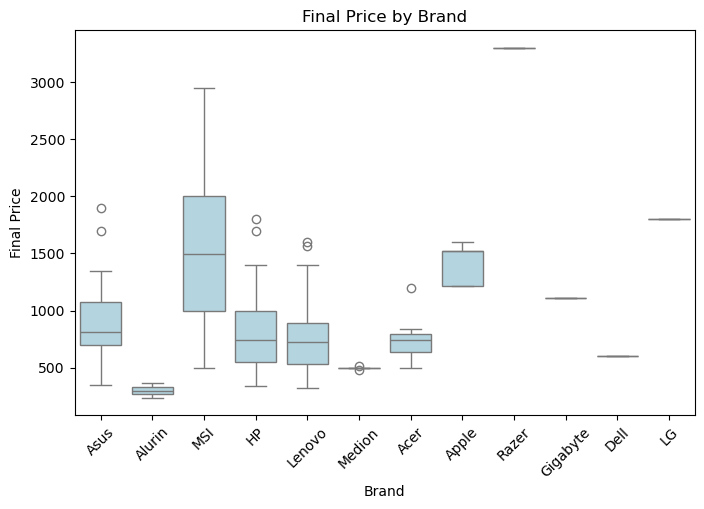

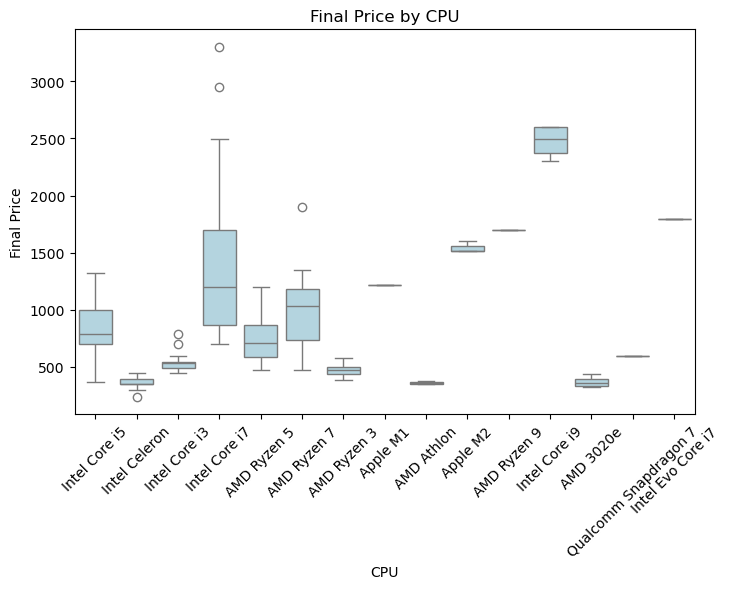

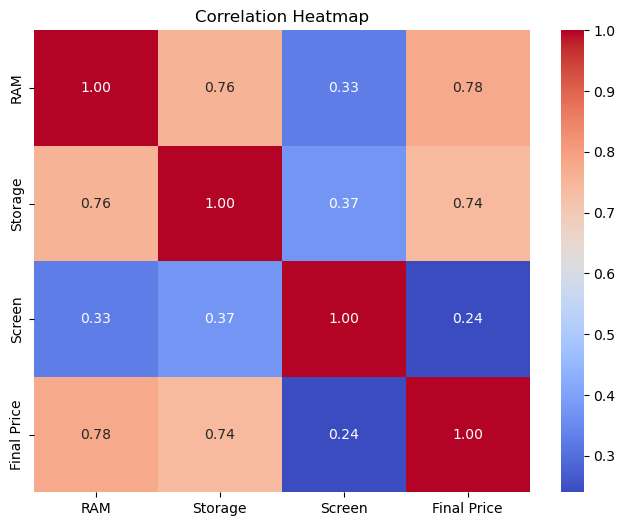

In [6]:

class BivariateAnalysis:
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def scatter_plot(self, x, y, width=6, height=4, point_color='b', title=None, xlabel=None, ylabel=None):
        """ Scatter plot for numeric vs numeric"""
        plt.figure(figsize=(width, height))
        sns.scatterplot(x=self.data[x], y=self.data[y], color=point_color)
        plt.title(title or f'{x} vs {y}')
        plt.xlabel(xlabel or x)
        plt.ylabel(ylabel or y)
        plt.show()    
  
    def box_plot(self, x, y, width=8, height=5, box_color='lightblue', rotation=45, title=None):
        """ Box plot for categorical vs numeric"""
        plt.figure(figsize=(width, height))
        sns.boxplot(x=self.data[x], y=self.data[y], color=box_color)
        plt.title(title or f'{y} by {x}')
        plt.xticks(rotation=rotation)
        plt.show()


    def correlation_heatmap(self, width=8, height=6, cmap='coolwarm', fmt=".2f", annot=True, title='Correlation Heatmap'):
        """Correlation heatmap for numeric columns"""
        plt.figure(figsize=(width, height))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=annot, cmap=cmap, fmt=fmt)
        plt.title(title)
        plt.show()

        
biv = BivariateAnalysis(data)

"""Numeric vs numeric"""
biv.scatter_plot('RAM', 'Final Price')
biv.scatter_plot('Storage', 'Final Price')

"""Categorical vs numeric"""
biv.box_plot('Brand', 'Final Price')
biv.box_plot('CPU', 'Final Price')

"""Correlation heatmap"""
biv.correlation_heatmap()


## data spilting

In [7]:
class DataSplitter:
    def __init__(self, data, target_column):
        """Store the full dataset and target column"""
        self.data = data
        self.target_column = target_column

    def split(self, test_size=0.2, random_state=42):
        """Split the data into features (X) and target (y)"""
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]

        """Perform train-test split"""
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        """Store and return splits"""
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        return X_train, X_test, y_train, y_test
splitter = DataSplitter(processed_data, target_column='Final Price')
X_train, X_test, y_train, y_test = splitter.split(test_size=0.2)
print(X_train,y_train,X_test,y_test)

          RAM  Storage  Screen  Brand_Acer  Brand_Alurin  Brand_Apple  \
183  1.000000    1.000    16.0       False         False        False   
38   0.428571    0.512    15.6       False         False        False   
24   0.142857    0.256    15.6        True         False        False   
142  1.000000    1.000    15.6       False         False        False   
141  1.000000    1.000    15.6       False         False        False   
..        ...      ...     ...         ...           ...          ...   
106  0.142857    0.512    15.6       False         False        False   
14   0.142857    0.256    15.6       False         False        False   
92   0.000000    0.128    15.6       False         False        False   
179  1.000000    1.000    16.0       False         False        False   
102  0.142857    0.256    15.6       False         False        False   

     Brand_Asus  Brand_Dell  Brand_Gigabyte  Brand_HP  ...  GPU_RTX 4050  \
183       False       False           False    

## data training

In [8]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

class ModelTrainer:
    def __init__(self):
        self.model = SVR()
        print("🤖 SVR model created.")

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        print("✅ Model training complete.")

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        print("📉 Evaluation Metrics:")
        print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
        print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

    def get_model(self):
        return self.model
    
   
"""Train and evaluate using your class"""
trainer = ModelTrainer()
trainer.train(X_train, y_train)
trainer.evaluate(X_test, y_test)


🤖 SVR model created.
✅ Model training complete.
📉 Evaluation Metrics:
Mean Squared Error: 0.01
R² Score: 0.55


## plot graphs

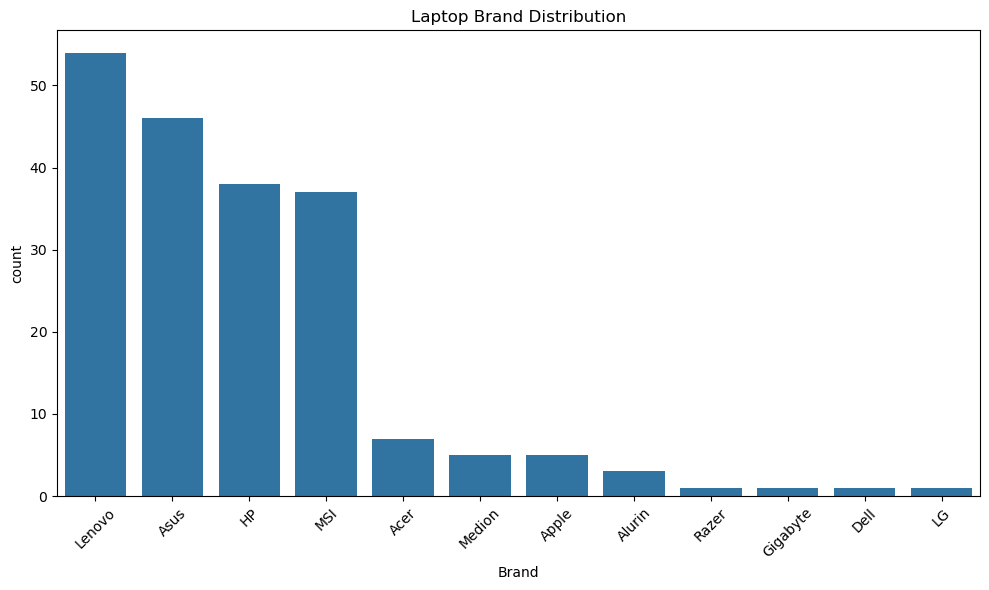

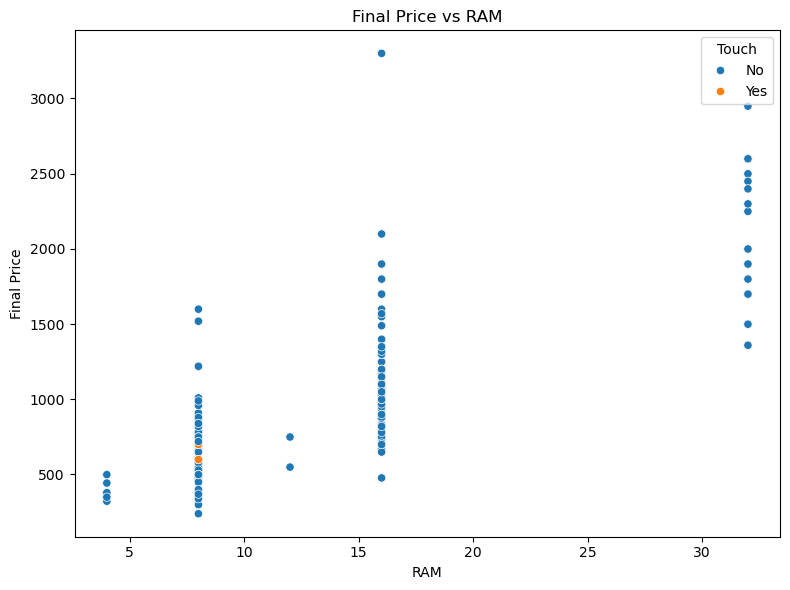

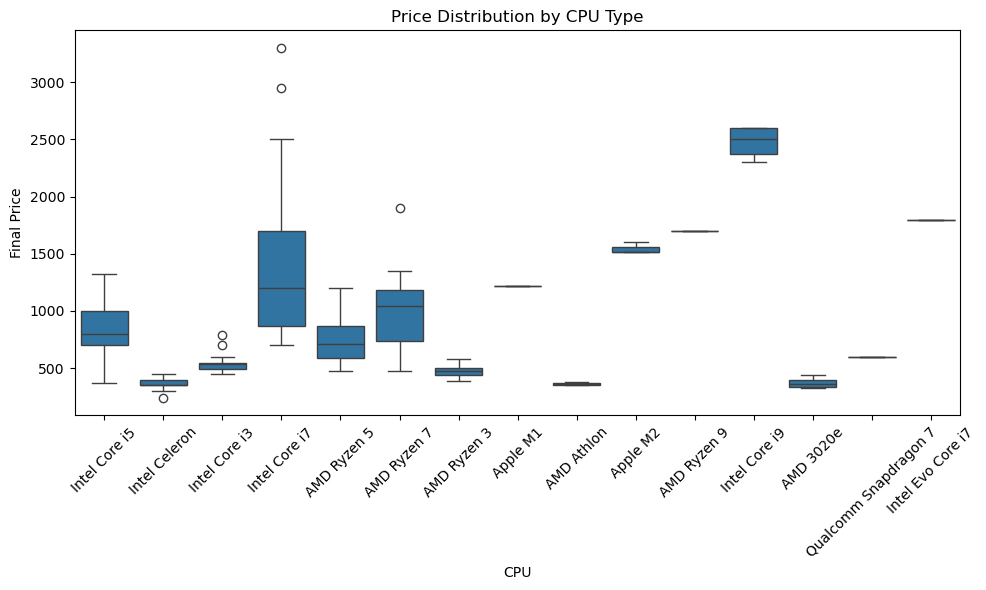

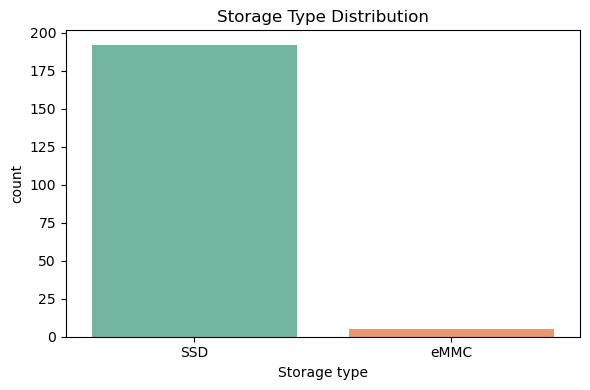

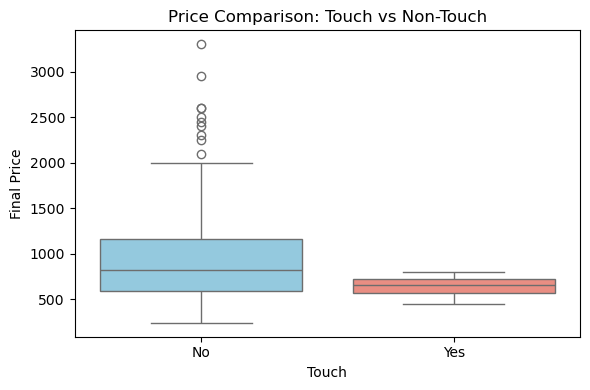

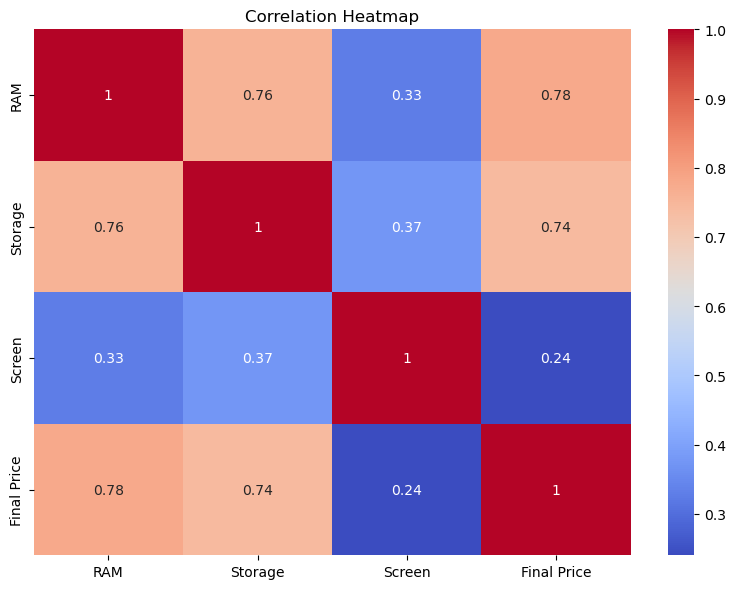

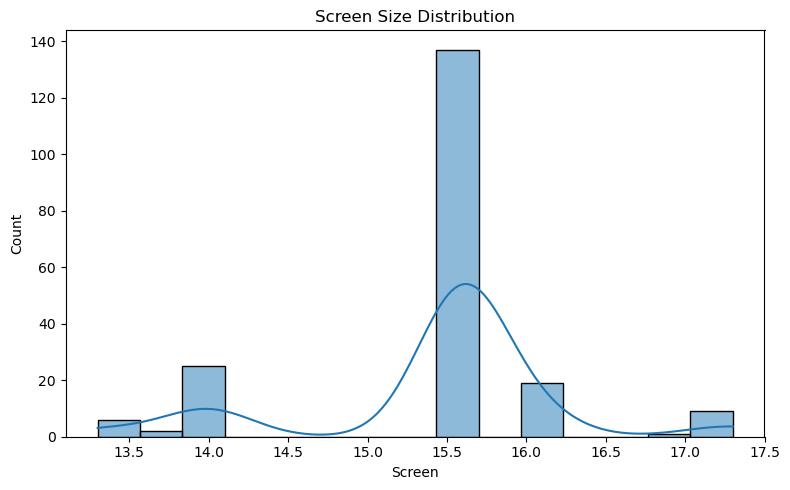

In [9]:
class Visualizer:
    def __init__(self, data):
        self.data = data

    def plot_brand_distribution(self, column='Brand', width=10, height=6, rotation=45, title='Laptop Brand Distribution'):
        plt.figure(figsize=(width, height))
        sns.countplot(data=self.data, x=column, order=self.data[column].value_counts().index)
        plt.title(title)
        plt.xticks(rotation=rotation)
        plt.tight_layout()
        plt.show()

    def plot_price_vs_ram(self, x='RAM', y='Final Price', hue='Touch', width=8, height=6, title='Final Price vs RAM'):
        plt.figure(figsize=(width, height))
        sns.scatterplot(data=self.data, x=x, y=y, hue=hue)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_cpu_price_box(self, x='CPU', y='Final Price', width=10, height=6, rotation=45, title='Price Distribution by CPU Type'):
        plt.figure(figsize=(width, height))
        sns.boxplot(data=self.data, x=x, y=y)
        plt.xticks(rotation=rotation)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_storage_type_distribution(self, x='Storage type', hue='Storage type', width=6, height=4, palette='Set2', legend=False, title='Storage Type Distribution'):
        plt.figure(figsize=(width, height))
        sns.countplot(data=self.data, x=x, hue=hue, palette=palette, legend=legend)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_touch_vs_price(self, x='Touch', y='Final Price', hue='Touch', palette=['skyblue', 'salmon'], legend=False, width=6, height=4, title='Price Comparison: Touch vs Non-Touch'):
        plt.figure(figsize=(width, height))
        sns.boxplot(data=self.data, x=x, y=y, hue=hue, palette=palette, legend=legend)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_correlation_heatmap(self, width=8, height=6, cmap='coolwarm', annot=True, title='Correlation Heatmap'):
        plt.figure(figsize=(width, height))
        numeric_data = self.data.select_dtypes(include='number')
        sns.heatmap(numeric_data.corr(), annot=annot, cmap=cmap)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    def plot_screen_size_distribution(self, column='Screen', bins=15, kde=True, width=8, height=5, title='Screen Size Distribution'):
        plt.figure(figsize=(width, height))
        sns.histplot(self.data[column], bins=bins, kde=kde)
        plt.title(title)
        plt.tight_layout()
        plt.show()

        
viz = Visualizer(data)

viz.plot_brand_distribution()
viz.plot_price_vs_ram()
viz.plot_cpu_price_box()
viz.plot_storage_type_distribution()
viz.plot_touch_vs_price()
viz.plot_correlation_heatmap()
viz.plot_screen_size_distribution()


## model storage using pickle

In [10]:
import pickle


with open('svr_model.pkl', 'wb') as file:
    """Save the trained SVR model using pickle"""
    pickle.dump(trainer.get_model(), file)
print("💾 Model saved to 'svr_model.pkl'.")


with open('svr_model.pkl', 'rb') as file:
    """Load the model"""
    loaded_model = pickle.load(file)
print("📦 Model loaded from 'svr_model.pkl'.")


y_pred_loaded = loaded_model.predict(X_test)
"""Evaluate the loaded model"""
print("📊 Evaluation of Loaded Model:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_loaded):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_loaded):.2f}")

💾 Model saved to 'svr_model.pkl'.
📦 Model loaded from 'svr_model.pkl'.
📊 Evaluation of Loaded Model:
Mean Squared Error: 0.01
R² Score: 0.55
